In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
response=requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=c3cb0630-0650-46c1-a068-82d575c094b2&limit=4633")
response.json()['result']['records']

[{'_id': 1,
  'Code': 5,
  'smlmitzrach': 11825010,
  'shmmitzrach': 'מי גבינה, חומצי, נוזלי',
  'makor': 1,
  'edible': None,
  'psolet': None,
  'ahuz_ibud_nozlim': None,
  'protein': 0.8,
  'total_fat': 0.1,
  'carbohydrates': 5.1,
  'food_energy': 24,
  'alcohol': 0,
  'moisture': 93.4,
  'total_dietary_fiber': 0,
  'calcium': 103,
  'iron': 0.08,
  'magnesium': 10,
  'phosphorus': 78,
  'potassium': 143,
  'sodium': 48,
  'zinc': 0.43,
  'copper': 0,
  'vitamin_a_iu': 7,
  'carotene': 0,
  'vitamin_e': 0,
  'vitamin_c': 0.1,
  'thiamin': 0.04,
  'riboflavin': 0.14,
  'niacin': 0.08,
  'vitamin_b6': 0.04,
  'folate': 2,
  'folate_dfe': '',
  'vitamin_b12': 0.18,
  'cholesterol': 1,
  'saturated_fat': 0.06,
  'butyric': 0.004,
  'caproic': 0.001,
  'caprylic': 0.001,
  'capric': 0.002,
  'lauric': 0.001,
  'myristic': 0.008,
  'palmitic': 0.025,
  'stearic': 0.01,
  'oleic': 0.019,
  'linoleic': 0.003,
  'linolenic': 0,
  'arachidonic': 0,
  'docosahexanoic': 0,
  'palmitoleic': 0.0

# We will build our dataframe based on our paramaters

In [3]:
identity=[]
protein=[]
name=[]
total_fat=[]
total_sugars=[]
vitamin_a=[]
vitamin_b12=[]
vitamin_b6=[]
vitamin_c=[]
vitamin_e=[]
vitamin_k=[]
calories=[]

In [4]:
for data in response.json()['result']['records']:
    identity.append(data["_id"])
    protein.append(data["protein"])
    name.append(data["shmmitzrach"])
    total_fat.append(data["total_fat"])
    total_sugars.append(data["total_sugars"])
    vitamin_a.append(data["vitamin_a_iu"])
    vitamin_b12.append(data["vitamin_b12"])
    vitamin_b6.append(data["vitamin_b6"])
    vitamin_c.append(data["vitamin_c"])
    vitamin_e.append(data["vitamin_e"])
    vitamin_k.append(data["vitamin_k"])
    calories.append(data["food_energy"])

In [5]:
newDataFrame=pd.DataFrame({'name':name,'identity':identity,'protein':protein,'total_fat':total_fat,'total_sugars':total_sugars,
                          'vitamin_a':vitamin_a,'vitamin_b12':vitamin_b12,'vitamin_b6':vitamin_b6,'vitamin_c':vitamin_c,'vitamin_e':vitamin_e,
                          'vitamin_k':vitamin_k,'calories':calories})
newDataFrame

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42
...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"טופו במרקם רך, מועשר בסידן, משק ווילר",4629,14.4,7.4,0.0,140.9,0.00,0.02,0.2,NaN,NaN,130
4629,"טופו משי, ללא גלוטן, במרקם קשה, Silken firm",4630,6.9,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,62
4630,"טופו משי,קל, ללא גלוטן, במרקם קשה, Silken lite...",4631,6.3,0.8,0.5,0.0,0.00,0.00,0.0,NaN,NaN,37
4631,"טופו משי, ללא גלוטן, במרקם רך, Silken soft",4632,4.8,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,55


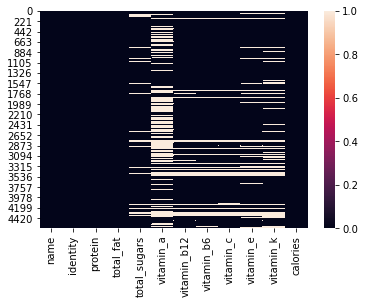

In [6]:
sns.heatmap(newDataFrame.isnull())

In [7]:
DataFrame=newDataFrame.fillna(0)
DataFrame.head(10)

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,0.0,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42
5,"חלב 3% שומן, מועשר בסידן, תנובה,טרה,יטבתה",6,3.2,3.0,4.6,149.5,0.44,0.04,0.0,0.1,0.28,58
6,"חלב 3% שומן, מועשר בויטמינים B12, D,E, יטבתה",7,3.0,3.0,4.7,149.5,0.44,0.04,0.0,1.0,0.28,57
7,"חלב 1% שומן, תנובה, טרה, הרדוף, יטבתה",8,3.3,1.0,5.1,202.1,0.47,0.04,0.0,0.0,0.10,43
8,"משקה חלב בטעם וניל,3% שומן, טרה",9,2.5,3.0,9.9,588.0,0.30,0.04,0.9,0.1,0.30,86
9,"חלב 2% שומן, כולל דל לקטוז, תנובה",10,3.2,2.0,4.6,243.0,0.44,0.04,0.0,0.1,0.45,51


In [8]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4633 non-null   object 
 1   identity      4633 non-null   int64  
 2   protein       4633 non-null   float64
 3   total_fat     4633 non-null   float64
 4   total_sugars  4633 non-null   float64
 5   vitamin_a     4633 non-null   float64
 6   vitamin_b12   4633 non-null   float64
 7   vitamin_b6    4633 non-null   float64
 8   vitamin_c     4633 non-null   float64
 9   vitamin_e     4633 non-null   float64
 10  vitamin_k     4633 non-null   float64
 11  calories      4633 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 434.5+ KB


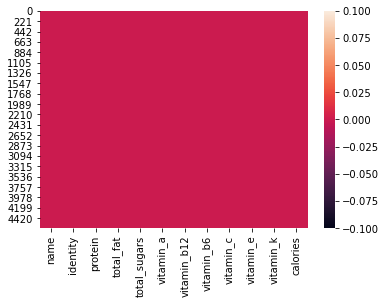

In [9]:
sns.heatmap(DataFrame.isnull())

## We will drop the name column because its irrelevant

In [10]:
DataFrame=DataFrame.drop(['name'],axis='columns')

In [11]:
DataFrame.head(5)

,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,3,1.0,4.4,6.9,0.0,0.05,0.01,5.0,0.1,0.30,70
3,4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42


In [12]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   identity      4633 non-null   int64  
 1   protein       4633 non-null   float64
 2   total_fat     4633 non-null   float64
 3   total_sugars  4633 non-null   float64
 4   vitamin_a     4633 non-null   float64
 5   vitamin_b12   4633 non-null   float64
 6   vitamin_b6    4633 non-null   float64
 7   vitamin_c     4633 non-null   float64
 8   vitamin_e     4633 non-null   float64
 9   vitamin_k     4633 non-null   float64
 10  calories      4633 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 398.3 KB


## Marking our target column - the calories

In [13]:
X=DataFrame.iloc[:,:-1]
X

,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k
0,1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00
1,2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47
2,3,1.0,4.4,6.9,0.0,0.05,0.01,5.0,0.1,0.30
3,4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28
4,5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10
...,...,...,...,...,...,...,...,...,...,...
4628,4629,14.4,7.4,0.0,140.9,0.00,0.02,0.2,0.0,0.00
4629,4630,6.9,2.7,1.3,0.0,0.00,0.01,0.0,0.0,0.00
4630,4631,6.3,0.8,0.5,0.0,0.00,0.00,0.0,0.0,0.00
4631,4632,4.8,2.7,1.3,0.0,0.00,0.01,0.0,0.0,0.00


In [14]:
Y=DataFrame.iloc[:,-1]
Y

0        24
1       112
2        70
3        60
4        42
       ... 
4628    130
4629     62
4630     37
4631     55
4632     22
Name: calories, Length: 4633, dtype: int64

In [15]:
print(X.shape,Y.shape)

(4633, 10) (4633,)
